In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
import scipy
from scipy.stats import ttest_ind, ttest_ind_from_stats
from scipy.special import stdtr

In [3]:
FILE_PATH = 'data/exp1_main2.json'
all_entries = []
all_entries1 = []
all_entries2 = []

with open(FILE_PATH) as file:
    all_entries1 = json.loads(file.read(), strict=False)

FILE_PATH = 'data/exp1_main.json'
with open(FILE_PATH) as file:
    for line in file:
        entry = json.loads(line)
        all_entries2.append(entry)
        e = entry['data']

all_entries = all_entries1+all_entries2
len(all_entries)

2640

In [4]:
start = []
finish = []
for entry in all_entries:
    if isinstance(entry['data'], dict):
        condition = entry['data']
        start.append(entry)
    else:
        condition = entry['data'][0]
        finish.append(entry)
print(len(start),len(finish))

def return_indices(user_order): #function that searches through the list of anagrams and returns the indices of the anagrams seen by the subject
    order = ['TEH', 'WYH', 'CPA', 'YSE', 'CPU','FNU', 'EEY', 'SNU', 'HTA', 'CNA', 'HTE', 'HWY', 'APC', 'EYS', 'PCU', 'NUF', 'YEE', 'UNS', 'AHT', 'ACN', 'WODR', 'DDEE', 'BLLE', 'STRO', 'PTIN', 'BTEL', 'CADR', 'FNDI', 'YLEL', 'CDOL','OWDR', 'EDDE', 'LBLE', 'TOSR', 'TIPN', 'TBLE', 'RADC', 'DIFN', 'LYLE','DOCL', 'VENGA','CLREK','PEOKR','OSIAS','GIATN','OUIPM','DONRO','PHNEO','ECELT','SCELA', 'EVANG', 'KLECR','KOERP','SAOSI','IGNAT','POUIM','OONRD','NPOHE','TELCE','ESALC', 'SADOWH','DOLRLA','RAODNM','SALYRA','WEIGTH','RDFUNE','LEETTR','CRABON','WIZRAD','BLLAET', 'HSOADW', 'RODLLA','MARNOD','AALRYS','IEGWHT','UEFNDR','RETLET','NCRBOA','ZIAWRD','EABLLT', 'CLEIMAT','JWAYALK','HAKMOCM','DURAELB','NAYUGHT','GLICAER','JLUMBED','EXPLIAN','GBRAAGE','JNOUREY', 'TCILAME','AYKAWLJ','CAMHOMK','EURADBL','AYUGNHT','CLAIGER','LUBMEJD','AXPLINE','BARAGGE','YUOEJRN']
    idx = []
    for i in range(len(user_order)):
        idx.append(order.index(user_order[i]))
    return idx

def label_point(x, y, val, ax, n):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    #print(a)
    for i, point in a.iterrows():
        ax.text(point['x']+.02, point['y'], str(point['val']), fontsize=n)

1410 1230


In [5]:
#get subject data for the 100 anagrams

time_guess = [[] for i in range(100)] 
actual_rt = [[] for i in range(100)]
give_up = [[] for i in range(100)]
aha = [[] for i in range(100)]
bad = 0
quit = 0

for entry in finish: 
    entry_data = entry['data']
    idx = return_indices((entry_data[0]['anagrams_seen'])) #get the indices of the anagrams seen by the subject
    anagrams_answers = entry_data[0]['anagrams_answers']
    
    counter = 3 #3 is first time quiz is given to subjects
    while '5' not in entry_data[counter]['responses']: #keep increasing counter everytime subject gets the quiz incorrectly
        counter = counter+2
    
    for j in range(5):
        counter = counter+3
        
        time_guess[idx[j]].append(entry_data[counter]['response'])

        counter = counter+1  
        rt = entry_data[counter]['rt']
        attempt = entry_data[counter]['responses'] 
        g = 0

        while anagrams_answers[j].lower() not in attempt.lower(): #keep incrementing until person gets correct answer or gives up
            if "next" in attempt.lower(): #break if person gave up
                g = 1
                quit = quit+1
                break
            else:                
                counter = counter+1
                attempt = entry_data[counter]['responses']
                rt = rt+entry_data[counter]['rt'] 
                
        if (rt*0.001)/60 > 4.3: #remove all responses greater than max(mean_rt)+1.5*max(mean_std).
            bad = bad+1
            g = 1
            
        give_up[idx[j]].append(g) #did subject give up or not
        actual_rt[idx[j]].append(rt) #append actual time to complete

        counter = counter+1    
        r = entry_data[counter]['responses'] #aha rating
        aha[idx[j]].append(int(r[6])+1)

print(bad, quit)

25 592


In [6]:
#data conversion, clean-up, and storage here
anagrams = order = ['TEH', 'WYH', 'CPA', 'YSE', 'CPU','FNU', 'EEY', 'SNU', 'HTA', 'CNA', 'HTE', 'HWY', 'APC', 'EYS', 'PCU', 'NUF', 'YEE', 'UNS', 'AHT', 'ACN', 'WODR', 'DDEE', 'BLLE', 'STRO', 'PTIN', 'BTEL', 'CADR', 'FNDI', 'YLEL', 'CDOL','OWDR', 'EDDE', 'LBLE', 'TOSR', 'TIPN', 'TBLE', 'RADC', 'DIFN', 'LYLE','DOCL', 'VENGA','CLREK','PEOKR','OSIAS','GIATN','OUIPM','DONRO','PHNEO','ECELT','SCELA', 'EVANG', 'KLECR','KOERP','SAOSI','IGNAT','POUIM','OONRD','NPOHE','TELCE','ESALC', 'SADOWH','DOLRLA','RAODNM','SALYRA','WEIGTH','RDFUNE','LEETTR','CRABON','WIZRAD','BLLAET', 'HSOADW', 'RODLLA','MARNOD','AALRYS','IEGWHT','UEFNDR','RETLET','NCRBOA','ZIAWRD','EABLLT', 'CLEIMAT','JWAYALK','HAKMOCM','DURAELB','NAYUGHT','GLICAER','JLUMBED','EXPLIAN','GBRAAGE','JNOUREY', 'TCILAME','AYKAWLJ','CAMHOMK','EURADBL','AYUGNHT','CLAIGER','LUBMEJD','AXPLINE','BARAGGE','YUOEJRN']
mean_time_guess = []
mean_rt = []
mean_tpe = []
mean_aha = []
mean_tpe2 = []
mean_aha2 = []
std_rt = [] #std deviation of the RT for the 100 anagrams

for i in range(100): #go through all 100 anagrams here
    give_up_i = give_up[i]
    aha_i = aha[i]    
    time_guess_i = np.asarray(time_guess[i], dtype='float64')*(3/100)*(60) 
    actual_rt_i = np.asarray(actual_rt[i], dtype='float64')*0.001  
    tpe_i = (time_guess_i-actual_rt_i)
    
    indexes = [i for i,x in enumerate(give_up_i) if x == 0] #only get subjects who solved the anagram    
    aha_i = np.asarray(aha_i)
    aha_i = aha_i[np.asarray(indexes)] 
    time_guess_i = time_guess_i[np.asarray(indexes)] 
    actual_rt_i = actual_rt_i[np.asarray(indexes)] 
    tpe_i = tpe_i[np.asarray(indexes)]
    mean_time_guess.append(np.mean(time_guess_i/60))
    mean_rt.append(np.mean(actual_rt_i/60))
    std_rt.append(np.std(actual_rt_i/60))
    mean_tpe.append(np.mean(tpe_i/60))
    mean_aha.append(np.mean(aha_i))
    mean_tpe2.append(tpe_i/60) #this is for power analysis later on
    mean_aha2.append(aha_i)
    
    print('Anagram:', anagrams[i],  '| mean TE:', round(mean_time_guess[i],2), '| std TE:', round(np.std(time_guess_i/60),2) , '| mean RT:', round(mean_rt[i],2), '| std RT:', round(std_rt[i],2), '| mean Aha:', round(mean_aha[i],1), 'numSubs:', len(aha_i))
    


Anagram: TEH | mean TE: 0.33 | std TE: 0.64 | mean RT: 0.08 | std RT: 0.08 | mean Aha: 3.6 numSubs: 65
Anagram: WYH | mean TE: 0.38 | std TE: 0.62 | mean RT: 0.07 | std RT: 0.04 | mean Aha: 3.8 numSubs: 65
Anagram: CPA | mean TE: 0.52 | std TE: 0.69 | mean RT: 0.14 | std RT: 0.32 | mean Aha: 4.1 numSubs: 55
Anagram: YSE | mean TE: 0.25 | std TE: 0.4 | mean RT: 0.06 | std RT: 0.02 | mean Aha: 4.1 numSubs: 58
Anagram: CPU | mean TE: 0.32 | std TE: 0.54 | mean RT: 0.09 | std RT: 0.05 | mean Aha: 3.7 numSubs: 50
Anagram: FNU | mean TE: 0.42 | std TE: 0.77 | mean RT: 0.1 | std RT: 0.12 | mean Aha: 3.5 numSubs: 51
Anagram: EEY | mean TE: 0.31 | std TE: 0.48 | mean RT: 0.08 | std RT: 0.06 | mean Aha: 3.8 numSubs: 54
Anagram: SNU | mean TE: 0.5 | std TE: 0.81 | mean RT: 0.11 | std RT: 0.12 | mean Aha: 3.8 numSubs: 66
Anagram: HTA | mean TE: 0.19 | std TE: 0.37 | mean RT: 0.1 | std RT: 0.18 | mean Aha: 3.4 numSubs: 74
Anagram: CNA | mean TE: 0.38 | std TE: 0.59 | mean RT: 0.09 | std RT: 0.11 | 

In [12]:
from scipy import stats
print(np.corrcoef(mean_tpe, mean_aha))
print(stats.pearsonr(mean_tpe, mean_aha))
print(np.corrcoef(mean_rt, mean_aha))
print(stats.pearsonr(mean_rt, mean_aha))
print(np.corrcoef(mean_time_guess, mean_aha))
print(stats.pearsonr(mean_time_guess, mean_aha))


print(max(mean_rt)+1.5*max(std_rt)) #criteria used for exclusion

print(np.mean(mean_rt))
print(np.mean(mean_tpe))


[[1.         0.67714049]
 [0.67714049 1.        ]]
(0.6771404889219035, 1.0354287768894393e-14)
[[1.         0.59165938]
 [0.59165938 1.        ]]
(0.5916593807367054, 9.040325209246287e-11)
[[1.         0.73959623]
 [0.73959623 1.        ]]
(0.739596227960692, 1.51840829076687e-18)
2.36805611089121
0.25367577153389237
0.5575410294309175


/Users/rachitdubey/miniconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[(0.0, 1.4)]

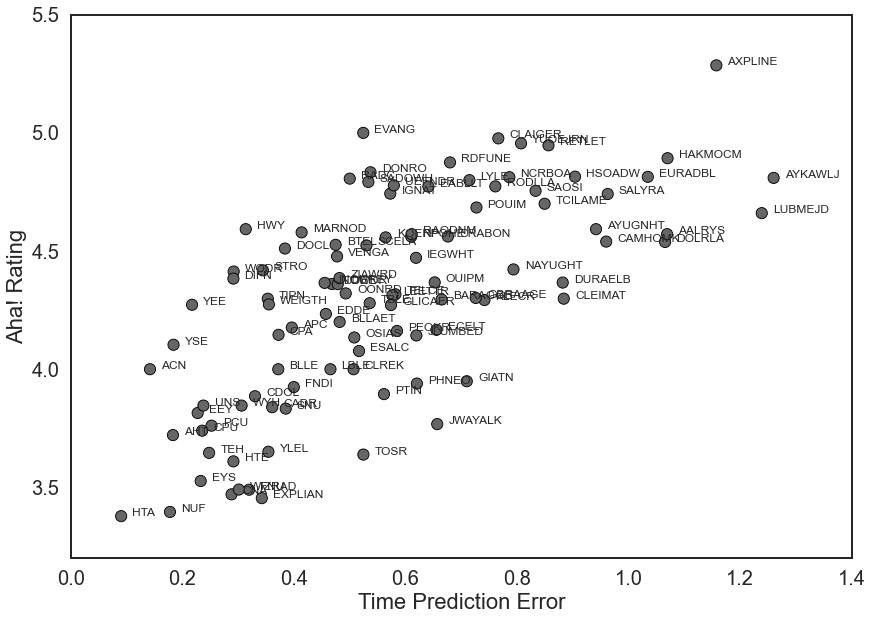

In [8]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.style as style 

n = 20
plt.rcParams.update({'font.size': n})
plt.rcParams["figure.figsize"] = (14,10)
plt.rcParams['xtick.major.pad']='8'
plt.rcParams['ytick.major.pad']='8'
plt.rc('axes', linewidth=2)

#style.use('ggplot')
sns.set_style("white", {"axes.facecolor": "1"})

df = pd.DataFrame({'anagrams': ['TEH', 'WYH', 'CPA', 'YSE', 'CPU','FNU', 'EEY', 'SNU', 'HTA', 'CNA', 'HTE', 'HWY', 'APC', 'EYS', 'PCU', 'NUF', 'YEE', 'UNS', 'AHT', 'ACN', 'WODR', 'DDEE', 'BLLE', 'STRO', 'PTIN', 'BTEL', 'CADR', 'FNDI', 'YLEL', 'CDOL','OWDR', 'EDDE', 'LBLE', 'TOSR', 'TIPN', 'TBLE', 'RADC', 'DIFN', 'LYLE','DOCL', 'VENGA','CLREK','PEOKR','OSIAS','GIATN','OUIPM','DONRO','PHNEO','ECELT','SCELA', 'EVANG', 'KLECR','KOERP','SAOSI','IGNAT','POUIM','OONRD','NPOHE','TELCE','ESALC', 'SADOWH','DOLRLA','RAODNM','SALYRA','WEIGTH','RDFUNE','LEETTR','CRABON','WIZRAD','BLLAET', 'HSOADW', 'RODLLA','MARNOD','AALRYS','IEGWHT','UEFNDR','RETLET','NCRBOA','ZIAWRD','EABLLT', 'CLEIMAT','JWAYALK','HAKMOCM','DURAELB','NAYUGHT','GLICAER','JLUMBED','EXPLIAN','GBRAAGE','JNOUREY', 'TCILAME','AYKAWLJ','CAMHOMK','EURADBL','AYUGNHT','CLAIGER','LUBMEJD','AXPLINE','BARAGGE','YUOEJRN'],
    'tpe': mean_tpe,
    'aha': mean_aha,
    'estimate': mean_time_guess,
     'rt':  mean_rt})

sns_plot = sns.scatterplot('tpe', 'aha', size="aha",  edgecolor = '0', facecolor='0.4', sizes=(125, 125), legend=False, data=df)
label_point(df['tpe'], df['aha'], df['anagrams'] , plt.gca(), n=12) #function to label point in scatter plot
#sns.despine(left=True, bottom=True)
#sns.despine(offset=1, trim=True);
plt.tick_params(labelsize=n)
plt.xlabel(xlabel='Time Prediction Error', size=n+2)
plt.ylabel(ylabel='Aha! Rating', size=n+2)
sns_plot.set(ylim=(3.2, 5.5))
sns_plot.set(xlim=(0, 1.4))
#sns_plot.figure.savefig("corr.png", dpi=1200)

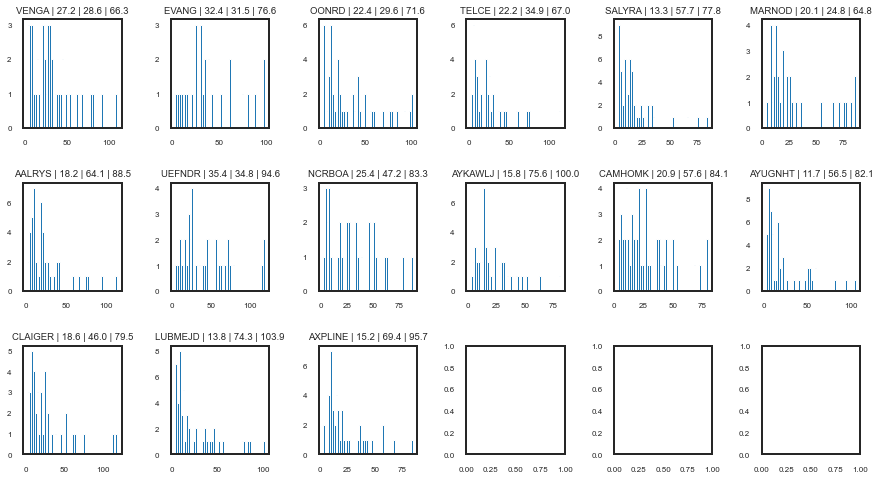

In [11]:
#histogram of mean RTs for anagrams that have high TPE and low RT -- for Exp 3
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.style as style 

mean_time_guess = []
mean_rt = []
mean_tpe = []
mean_aha = []
mean_tpe2 = []
mean_aha2 = []
std_rt = [] #std deviation of the RT for the 100 anagrams

#for subplot
font = {'size'   : 8}

matplotlib.rc('font', **font)

fig, axs = plt.subplots(3,6, figsize=(15, 8), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.5, wspace=0.5)
axs = axs.ravel()

j = 0
for i in range(100): #go through all 100 anagrams here
    give_up_i = give_up[i]
    aha_i = aha[i]    
    time_guess_i = np.asarray(time_guess[i], dtype='float64')*(3/100)*(60) 
    actual_rt_i = np.asarray(actual_rt[i], dtype='float64')*0.001  
    tpe_i = (time_guess_i-actual_rt_i)
    
    indexes = [i for i,x in enumerate(give_up_i) if x == 0] #only get subjects who solved the anagram    
    aha_i = np.asarray(aha_i)
    aha_i = aha_i[np.asarray(indexes)] 
    time_guess_i = time_guess_i[np.asarray(indexes)] 
    actual_rt_i = actual_rt_i[np.asarray(indexes)] 
    tpe_i = tpe_i[np.asarray(indexes)]
    mean_time_guess.append(np.mean(time_guess_i/60))
    mean_rt.append(np.mean(actual_rt_i/60))
    std_rt.append(np.std(actual_rt_i/60))
    mean_tpe.append(np.mean(tpe_i/60))
    mean_aha.append(np.mean(aha_i))
    mean_tpe2.append(tpe_i/60) #this is for power analysis later on
    mean_aha2.append(aha_i)
    
    if mean_time_guess[i] > 1 and np.median(actual_rt_i) > 13: #and mean_rt[i] > 0.4 and mean_rt[i] < 0.5 and len(anagrams[i])>6: 
        a = actual_rt_i[actual_rt_i < 120]
        b = time_guess_i
        axs[j].hist(a, 50)
        #axs[j].set_xticks([0, 20, 40, 60, 80, 100])
        axs[j].set_title(anagrams[i] + ' | ' + str(round(np.median(a),1)) + ' | ' + str(round(np.mean(tpe_i),1))+ ' | '+ str(round(np.mean(b),1)))
        j = j+1
        
        #print('Anagram:', anagrams[i],  '| mean TE:', round(mean_time_guess[i],2), '| std TE:', round(np.std(time_guess_i/60),2) , '| mean RT:', round(mean_rt[i],2), '| std RT:', round(std_rt[i],2), '| mean Aha:', round(mean_aha[i],1), 'numSubs:', len(aha_i))

In [ ]:
salary: 18.2, 88.5, 64.1, 49
jaywalk: 15.8, 100.0, 75.6, 41
naughty: 11.7, 82.1, 56.5, 53
jumbled: 13.8, 103.9, 74.3, 52
explain: 15.2, 95.7, 69.4, 47    
    

In [19]:
from scipy.stats import f_oneway

import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.style as style 

mean_time_guess = []
mean_rt = []
mean_tpe = []
mean_aha = []
mean_tpe2 = []
mean_aha2 = []
std_rt = [] #std deviation of the RT for the 100 anagrams

j = 0
for i in range(100): #go through all 100 anagrams here
    give_up_i = give_up[i]
    aha_i = aha[i]    
    time_guess_i = np.asarray(time_guess[i], dtype='float64')*(3/100)*(60) 
    actual_rt_i = np.asarray(actual_rt[i], dtype='float64')*0.001  
    tpe_i = (time_guess_i-actual_rt_i)
    
    indexes = [i for i,x in enumerate(give_up_i) if x == 0] #only get subjects who solved the anagram    
    aha_i = np.asarray(aha_i)
    aha_i = aha_i[np.asarray(indexes)] 
    time_guess_i = time_guess_i[np.asarray(indexes)] 
    actual_rt_i = actual_rt_i[np.asarray(indexes)] 
    tpe_i = tpe_i[np.asarray(indexes)]
    mean_time_guess.append(np.mean(time_guess_i/60))
    mean_rt.append(np.mean(actual_rt_i/60))
    std_rt.append(np.std(actual_rt_i/60))
    mean_tpe.append(np.mean(tpe_i/60))
    mean_aha.append(np.mean(aha_i))
    mean_tpe2.append(tpe_i/60) #this is for power analysis later on
    mean_aha2.append(aha_i)
    
    if anagrams[i] == 'AALRYS':
        g1 = time_guess_i
        g1_a = tpe_i
    elif anagrams[i] == 'AYKAWLJ':
        g2 = time_guess_i
        g2_a = tpe_i
    elif anagrams[i] == 'AYUGNHT':
        g3 = time_guess_i
        g3_a = tpe_i
    elif anagrams[i] == 'LUBMEJD':
        g4 = time_guess_i
        g4_a = tpe_i
    elif anagrams[i] == 'AXPLINE':
        g5 = time_guess_i
        g5_a = tpe_i
    else:
        m = 1

In [21]:
f_oneway(g1_a, g2_a, g3_a, g4_a, g5_a)

F_onewayResult(statistic=1.0529487419257655, pvalue=0.3805470388793393)

In [33]:
scipy.stats.ttest_ind(g3_a, g1_a) 

Ttest_indResult(statistic=-0.7143392214325907, pvalue=0.476665161316844)

In [41]:
np.max(mean_rt)+1.5*np.max(std_rt)

2.36805611089121

In [128]:
np.mean(mean_rt)

0.25294434882273764